In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot(network_history):
    plt.figure()
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='upper right')
    
    plt.figure()
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='lower left')
    plt.show()


def metrics_best(path, X_val, Y_true):
    best_model = load_model(path)
    Y_pred = best_model.predict(X_val)
    print(confusion_matrix(Y_true, np.argmax(Y_pred, axis=1)))
    print(classification_report(Y_true, np.argmax(Y_pred, axis=1)))

In [3]:
iris_dataset = np.loadtxt("iris.txt")
X, Y = iris_dataset[:, 0: 4], iris_dataset[:, -1]
print(X.shape, Y.shape)

(100, 4) (100,)


In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.74, random_state=42, stratify=Y)

In [5]:
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(74, 4) (26, 4) (74,) (26,)


In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [7]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train).astype(np.int32)
Y_train = to_categorical(Y_train)
Y_val_no_encoded = Y_val.copy()
Y_val = encoder.transform(Y_val).astype(np.int32)
Y_val = to_categorical(Y_val)


In [8]:
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(74, 4) (26, 4) (74, 2) (26, 2)


In [9]:
input_dim = X_train.shape[1]
nb_classes = Y_train.shape[1]

In [10]:
input_dim, nb_classes

(4, 2)

In [11]:
def my_loss_fn(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1) 

In [12]:
model = Sequential()
model.add(Dense(nb_classes, input_shape=(input_dim,), activation = "sigmoid",use_bias=False))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [14]:
sgd = optimizers.SGD(learning_rate=0.01, momentum=0, nesterov=False)

In [15]:
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
filepath="Models\\weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=0, mode='min')
callbacks_list = [checkpoint, early_stopping]

In [17]:
n_epochs = 35
network_history = model.fit(X_train, Y_train, batch_size=len(X_val), epochs=n_epochs, callbacks=callbacks_list, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/35
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/3 [=========>....................] - ETA: 0s - loss: 0.7848 - accuracy: 0.5769WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001DF17500948> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 1s 220ms/step - loss: 0.7449 - accuracy: 0.5674 - val_loss: 0.8290 - val_accuracy: 0.6154

Epoch 00001: val_accuracy improved from -inf to 0.61538, saving model to Models\weights.best.hdf5
Epoch 2/35
3/3 [==============================] - 0s 24ms/step - loss: 0.6895 - accuracy: 0.5877 - val_loss: 0.7989 - val_accuracy: 0.6154

Epoch 00002: val_accuracy did not improve from 0.61538
Epoch 3/35
3/3 [==============================] - 0s 28ms/step - loss: 0.6683 - accuracy: 0.6349 - val_loss: 0.7703 - val_accuracy: 0.6538

Epoch 00003: val_accuracy improved from 0.61538 to 0.65385, saving model to Models\weights.best.hdf5
Epoch 4/35
3/3 [===

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[11  2]
 [ 2 11]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        13
         1.0       0.85      0.85      0.85        13

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26



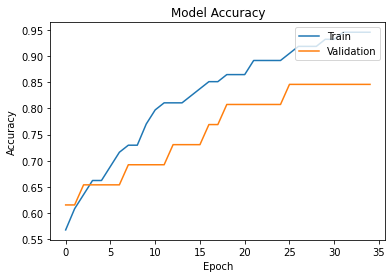

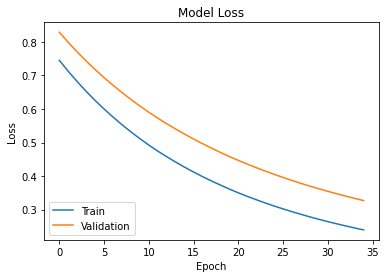

In [18]:
path = 'Models\\weights.best.hdf5'
Y_val_no_encoded = np.where(Y_val_no_encoded<0,0,Y_val_no_encoded)
metrics_best(path,X_val,Y_val_no_encoded)

plot(network_history)